## ex5. Regularized linear regression: vias versus variance

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water 
flowing out of a dam using the change of water level in a reservoir.

#### Input data: ex5data1.mat

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.optimize as op

### Part I : Regularized linear regression

### 1. Load the water datasets

In [2]:
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
data=loadmat('ex5data1.mat') # loaded data is a dictionary

In [3]:
# You will have X, y, Xval, yval, Xtest, ytest in your environment
print(type(data))
print('')
print(data.keys())

<class 'dict'>

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])


In [4]:
# Create a dataframe water, water_test, water_train

water=np.concatenate((data['X'], data['y']), axis=1)
water=pd.DataFrame(water, columns=['X','y'])

water_test=np.concatenate((data['Xtest'], data['ytest']), axis=1)
water_test=pd.DataFrame(water_test, columns=['Xtest','ytest'])

water_val=np.concatenate((data['Xval'], data['yval']), axis=1)
water_val=pd.DataFrame(water_val, columns=['Xval','yval'])

### 2. Visualization, plot the training data

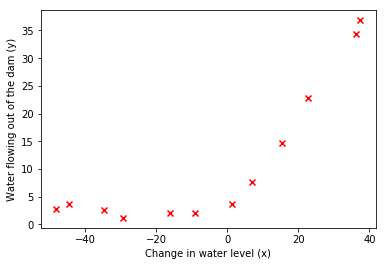

In [5]:
X=water['X']
y=water['y']
m = len(X)
plt.scatter(X, y, c='r', marker='x');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');


### 3: Regularized Linear Regression Cost

In [6]:
theta =np.ones((2,1))
X=pd.concat((pd.DataFrame(np.ones((m,1))), X), axis=1) # add x0=1 for X

The cost function Jtheta and the partial derivative of regularized linear regression's cost for thetai is defined as below

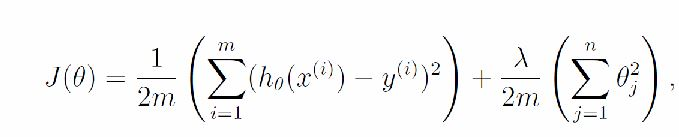

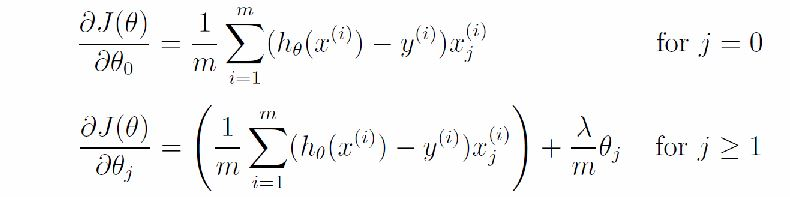

In [12]:
from IPython.display import Image
display(Image(filename='../pic/jtheta.jpg', width=400, height=300))
display(Image(filename='../pic/linear regression gradient.jpg', width=600, height=300))

In [14]:
def linearRegCostFunction(X, y, theta, lamb):
    """
    LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear regression with multiple variables
    [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the cost of using theta as the parameter 
    for linear regression to fit the data points in X and y. Returns the cost in J and the gradient in grad
    lamb: penalty factor
    """
    thetanew=theta.copy()
    thetanew[0]=0
    m,n = X.shape
    J = 0;
    grad = np.zeros(len(theta))
    J=1/(2)*((np.array(X.dot(theta)[0])-np.array(y))**2).mean()+(thetanew*thetanew).sum()*lamb/2/m
    grad=1/m*((np.array(X.dot(theta)[0])-np.array(y)).reshape(1,m).dot(X)).reshape(n,1)+lamb/m*thetanew
    return J,grad

In [18]:
J,grad = linearRegCostFunction(X, y, theta, 1)
m,n = X.shape
print('Cost J returned by the function is:', np.round(J,3))
print('correct answer for cost is 303.993 \n')
print('grad returned by the function is: ', [np.round(a,2) for a in grad.reshape(1,2)])
print('correct answer for grad is [-15.30, 598.25]')

Cost J returned by the function is: 303.993
correct answer for cost is 303.993 

grad returned by the function is:  [array([-15.3 , 598.25])]
correct answer for grad is [-15.30, 598.25]


###  4: Train Linear Regression 

Once you have implemented the cost and gradient correctly, the trainLinearReg function will use your cost function to train regularized linear regression.

Write Up Note: The data is non-linear, so this will not give a great fit.

In [23]:
def trainLinearReg(X, y, lamb):   
 
    X=np.array(X)
    y=np.array(y)

    def Gradient(theta,x,y):
        m , n = x.shape
        theta = theta.reshape((n,1))
        newtheta=theta.copy()
        newtheta[0]=0
        y = y.reshape((m,1))
        grad = ((x.T).dot(x.dot(theta)-y))/m+(lamb*newtheta)/m;
        return grad.flatten();
    
    def CostFunc(theta,x,y):
        m,n = x.shape; 
        theta = theta.reshape((n,1))
        newtheta=theta.copy()
        newtheta[0]=0
        J = 1/(2)*((np.array(X.dot(theta)[0])-np.array(y))**2).mean()+lamb*(newtheta*newtheta).sum()/2/m ;
        return J;

    m , n = X.shape;
    initial_theta = np.ones(n);
    Result = op.minimize(fun = CostFunc, x0 = initial_theta, args = (X, y), method = 'TNC',jac = Gradient);
    optimal_theta = Result.x;     
    return optimal_theta

In [24]:
optimal_theta=trainLinearReg(X, y, lamb=0)

In [25]:
y_pred=np.dot(X,optimal_theta)

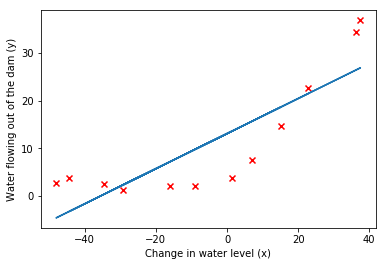

In [26]:
#  Plot fit over the data
plt.scatter(X['X'], y, c='r', marker='x');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.plot(X['X'], y_pred)

### Part 2: Bias-Variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

#### 1. Learning curves to debug learning algorithms

A learning curves plots training and cross validation error as a function of the training set size. 

In [29]:
mval=water_val.shape[0]
Xval=pd.concat((pd.DataFrame(np.ones((mval,1))), water_val['Xval']), axis=1) # add x0=1 for X
yval=water_val['yval']

mtest=water_test.shape[0]
Xtest=pd.concat((pd.DataFrame(np.ones((mtest,1))), water_test['Xtest']), axis=1) # add x0=1 for X
ytest=water_test['ytest']

In [48]:
def linearRegCostFunction(X, y, theta, lambda_val, return_grad=False):
    #LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    #regression with multiple variables

    # Initialize some useful values
    m,n = X.shape # number of training examples

    # force to be 2D vector
    theta = np.reshape(theta, (n,1))

    J = 0
    grad = np.zeros(theta.shape)

    # cost function
    J = ( 1/(2*m)) * np.power( (np.dot(X, theta) - pd.DataFrame(y)) , 2).sum() + ( float(lambda_val) / (2*m)) * np.power(theta[1:n],2).sum()

    # regularized gradient
    grad= (1/m) * np.dot( X.T, np.dot(X,theta) - pd.DataFrame(y)) + ( float(lambda_val) / m )*theta

    # unregularize first gradient
    grad_no_regularization = (1./m) * np.dot( X.T, np.dot(X,theta) - pd.DataFrame(y))
    grad[0] = grad_no_regularization[0]

    if return_grad == True:
        return J, grad.flatten()
    elif return_grad == False:
        return J 

In [49]:
from scipy.optimize import minimize

def trainLinearReg(X, y, lambda_val):
    #TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
    #regularization parameter lambda_val
    
    # Initialize Theta
    initial_theta = np.zeros((X.shape[1], 1))

    # Short hand for cost function to be minimized
    def costFunc(theta):
        return linearRegCostFunction(X, y, theta, lambda_val, True)

    # Now, costFunction is a function that takes in only one argument
    maxiter = 200
    results = minimize(costFunc, x0=initial_theta, options={'disp': True, 'maxiter':maxiter}, method="L-BFGS-B", jac=True)
    theta = results["x"]

    return theta

In [50]:
def learningCurve(X, y, Xval, yval, lambda_val):
    #LEARNINGCURVE Generates the train and cross validation set errors needed 
    #to plot a learning curve
    #   [error_train, error_val] = ...
    #       LEARNINGCURVE(X, y, Xval, yval, lambda_val) returns the train and
    #       cross validation set errors for a learning curve. In particular, 
    #       it returns two vectors of the same length - error_train and 
    #       error_val. Then, error_train(i) contains the training error for
    #       i examples (and similarly for error_val(i)).
    #
    #   In this function, you will compute the train and test errors for
    #   dataset sizes from 1 up to m. In practice, when working with larger
    #   datasets, you might want to do this in larger intervals.

    # Number of training examples
    m = len(X)

    # You need to return these values correctly
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))

    for i in range(1,m+1):

        # define training variables for this loop
        X_train = X[:i]
        y_train = y[:i]

        # learn theta parameters with current X_train and y_train
        theta = trainLinearReg(X_train, y_train, lambda_val)

        # fill in error_train(i) and error_val(i)
        #   note that for error computation, we set lambda_val = 0 in the last argument
        error_train[i-1] = linearRegCostFunction(X_train, y_train, theta, 0)
        error_val[i-1]   = linearRegCostFunction(Xval   , yval   , theta, 0)
                
    return error_train, error_val

In [51]:
lambda_val = 0
error_train, error_val = learningCurve(X, y, Xval, yval, lambda_val)

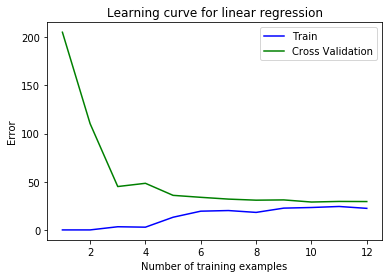

In [52]:
plt.plot(range(1,m+1), error_train, c='b', label='Train')
plt.plot(range(1,m+1), error_val, c='g', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.title('Learning curve for linear regression')
plt.legend(loc='upper right')

### Part III: Feature Mapping for Polynomial Regression

The problem for the simple linear regression is that it is too simple for the data and resulted in underfitting(high bias). We will use more features by adding the higher power of the existing features.

In [53]:
def polyFeatures(X, p):
    """
    POLYFEATURES Maps X (1D vector) into the p-th power
    [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
    maps each example into its polynomial features where
    X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p]
    """
    # You need to return the following variables correctly.
    m=X.shape[0]
    X_poly = np.zeros((m,p));
    # Instructions: Given a vector X, return a matrix X_poly where the p-th 
    # column of X contains the values of X to the p-th power.
    for i in range(1,p+1):
        X_poly[:,i-1]=np.power(X,i)
    return X_poly

Before learning the paramether theta, we will first normalize the feature of the training set and store the mu, sigma parameter separately.

In [54]:
def featureNormalize(X):
    """
    FEATURENORMALIZE Normalizes the features in X 
    FEATURENORMALIZE(X) returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    mu = np.mean(X, axis=0)
    sigma=np.std(X, axis=0)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma

In [55]:
p=8
X_poly=polyFeatures(X['X'], p)
X_poly, mu, sigma = featureNormalize(X_poly);  # Normalize
X_poly =np.column_stack((np.ones((m,1)), X_poly)) # Add Ones

In [59]:
# Map X_poly_test and normalize (using mu and sigma from the train data)
X_poly_test = polyFeatures(Xtest['Xtest'], p);
X_poly_test = (X_poly_test-mu.reshape(1,len(mu)))/sigma.reshape(1,len(mu))
X_poly_test = np.column_stack((np.ones((X_poly_test.shape[0],1)), X_poly_test))        # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval['Xval'], p);
X_poly_val = (X_poly_val-mu.reshape(1,len(mu)))/sigma.reshape(1, len(mu))
X_poly_val = np.column_stack((np.ones((X_poly_val.shape[0],1)), X_poly_val))        # Add Ones

### Part 4: Learning Curve for Polynomial Regression

Now, you will get to experiment with polynomial regression with multiple values of lambda. The code below runs polynomial regression with lambda = 0. You should try running the code with different values of
lambda to see how the fit and learning curve change.

#### Check different lamb on the hypothesis function and learning curve

1. lambda=1, fits the data well and learning curve is good. The error is small.

2. lambda=100, underfit. The hypothesis functions does not fit the data well. The error is big for both training error and cross-validation error.

In [63]:
lamb = 1;
theta = trainLinearReg(X_poly, y, lamb)
theta.shape

(9,)

In [64]:
def plotFit(min_x, max_x, mu, sigma, theta, p):
    """
    PLOTFIT Plots a learned polynomial regression fit over an existing figure.
    Also works with linear regression.
    PLOTFIT(min_x, max_x, mu, sigma, theta, p) plots the learned polynomial
    fit with power p and feature normalization (mu, sigma).
    """
# We plot a range slightly bigger than the min and max values to get
# an idea of how the fit will vary outside the range of the data points
    x =np.arange(min_x-15, max_x+25,step=0.05 )

# Map the X values 
    X_poly = polyFeatures(x, p);
    X_poly = (X_poly-mu.reshape(1,p))/sigma.reshape(1,p)

# Add ones
    X_poly = np.column_stack((np.ones((X_poly.shape[0],1)), X_poly))
    
# Plot
    plt.plot(x,np.dot( X_poly,theta))

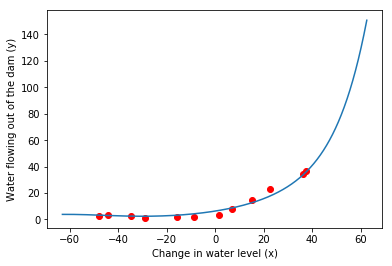

In [65]:
# Plot training data and fit

plt.scatter(X['X'], y, color='r');
plotFit(min(X['X']), max(X['X']), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');


In [66]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lamb);

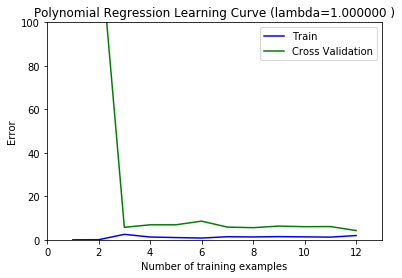

In [67]:
plt.plot(range(1,m+1), error_train, color='b', label='Train')
plt.plot(range(1,m+1), error_val, color='g', label='Cross Validation')

plt.title('Polynomial Regression Learning Curve (lambda={:f} )'.format(lamb));
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.ylim([0,100])
plt.xlim([0, 13])
plt.legend(loc='upper right')

(9,)


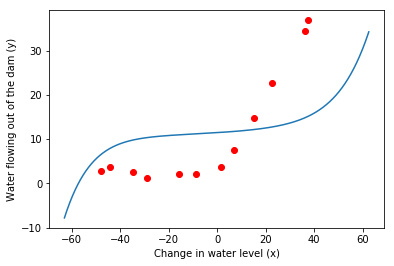

In [95]:
lamb = 100;
theta = trainLinearReg(X_poly, y, lamb)
print(theta.shape)
# Plot training data and fit

plt.scatter(X['X'], y, color='r');
plotFit(min(X['X']), max(X['X']), mu, sigma, theta, p)

plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

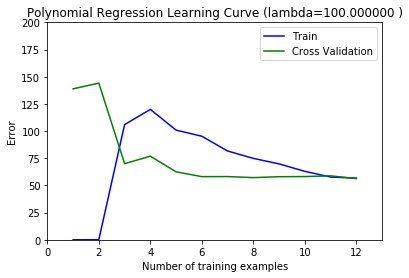

In [72]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, lamb);
plt.plot(range(1,m+1), error_train, color='b', label='Train')
plt.plot(range(1,m+1), error_val, color='g', label='Cross Validation')

plt.title('Polynomial Regression Learning Curve (lambda={:f} )'.format(lamb));
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.ylim([0,200])
plt.xlim([0, 13])
plt.legend(loc='upper right')

### Part 5: Validation for Selecting Lambda

You will now implement validationCurve to test various values of lambda on a validation set. You will then use this to select the "best" lambda value.

In [76]:
def validationCurve(X, y, Xval, yval):
    """
    VALIDATIONCURVE Generate the train and validation errors needed to
    plot a validation curve that we can use to select lambda
    [lambda_vec, error_train, error_val] = ...
    VALIDATIONCURVE(X, y, Xval, yval) returns the train and validation errors (in error_train, error_val)
    for different values of lambda. You are given the training set (X,y) and validation set (Xval, yval).
    """
# Selected values of lambda 
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = np.zeros((len(lambda_vec), 1));
    error_val = np.zeros((len(lambda_vec), 1));

# Note: loop over lambda_vec with the following:
    for i in range(len(lambda_vec)):
        lamb = lambda_vec[i]
        theta=trainLinearReg(X, y, lamb)
# fill in error_train(i) and error_val(i)
# note that for error computation, we set lambda = 0 in the last argument
        error_train[i]=linearRegCostFunction(X, y, theta, 0)
        error_val[i]=linearRegCostFunction(Xval, yval, theta, 0)
    return lambda_vec, error_train, error_val

In [77]:
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval);

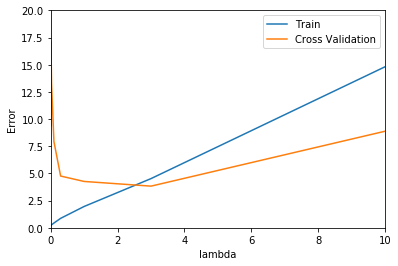

In [78]:
plt.plot(lambda_vec, error_train, label='Train')
plt.plot(lambda_vec, error_val, label='Cross Validation')
plt.xlabel('lambda');
plt.ylabel('Error');
#plt.ylim([0,20])
#plt.xlim([0,10])
plt.axis([0, 10, 0, 20])
plt.legend(loc='upper right')

### Compute test set error

To get a better indication of the model's performance in the real world, it is important to evaluate the final model on a test set that was not used in any part of the training (that is neither used to select lambda parameters nor to learn the model parameter theta.

In [97]:
# Test error for lambda=3
lamb=3
theta=trainLinearReg(X_poly, y, lamb)
error_test=linearRegCostFunction(X_poly_test, ytest, theta, 0)
print('the calculated test error is', error_test)
print('the answer should be 3.8599')

the calculated test error is ytest    3.57202
dtype: float64
the answer should be 3.8599


### Plot learning curves with randomly selected samples

When we plot learning curves to debug the algorithm, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross-validation error. 

To determine the training error and cross-validation error for the i-th example, we first randomly select i examples from the training set and i examples from the cross-validation set. We learn the parameter using the randomly selected chosen training set and evaluate the parameters theta on the chosen traing data and cross-validation data. The above step then be repeated multiple times, and the averaged error should be used to determine the training and cross-validation error for the i-th example.

In [123]:
import random
randidx=random.sample(range(0,500), 2)
randidx

[296, 192]

In [129]:
X

,0,X
0,1.0,-15.936758
1,1.0,-29.152979
2,1.0,36.189549
3,1.0,37.492187
4,1.0,-48.058829
5,1.0,-8.941458
6,1.0,15.307793
7,1.0,-34.706266
8,1.0,1.389154
9,1.0,-44.383760


In [132]:
import random

def learningCurveRand(X, y, Xval, yval, lambda_val, randn):
    m = len(X)

    # You need to return these values correctly
    error_train = np.zeros((m, 1))
    error_val   = np.zeros((m, 1))
    
    for i in range(1,m+1):
        temp_train=np.zeros(randn)
        temp_val=np.zeros(randn)
        for j in range(1,randn+1):
            randidx=random.sample(range(0,m), i)
            X_train = X[randidx]
            y_train = y[randidx]

        # learn theta parameters with current X_train and y_train
            theta = trainLinearReg(X_train, y_train, lambda_val)

        # fill in error_train(i) and error_val(i)
        #   note that for error computation, we set lambda_val = 0 in the last argument
            temp_train[j-1]=linearRegCostFunction(X_train, y_train, theta, 0)
            temp_val[j-1]=linearRegCostFunction(Xval   , yval   , theta, 0)
            
        error_train[i-1] = np.mean(temp_train)
        error_val[i-1]   = np.mean(temp_val)
                
    return error_train, error_val

In [133]:
lambda_val = 0.01
randn=50
error_train, error_val = learningCurveRand(X_poly, y, X_poly_val, yval, lambda_val, randn)

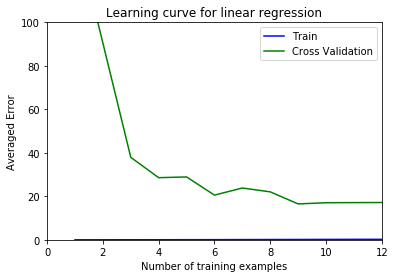

In [135]:
plt.plot(range(1,m+1), error_train, c='b', label='Train')
plt.plot(range(1,m+1), error_val, c='g', label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Averaged Error')
plt.xlim([0,12])
plt.ylim([0,100])
plt.title('Learning curve for linear regression')
plt.legend(loc='upper right')